<a href="https://colab.research.google.com/github/mmuucha/ML-01/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression model but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables... even shorter ... predicitng a number (also neural network definitions)

In [3]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.17.0


## Creating some data to view and fit

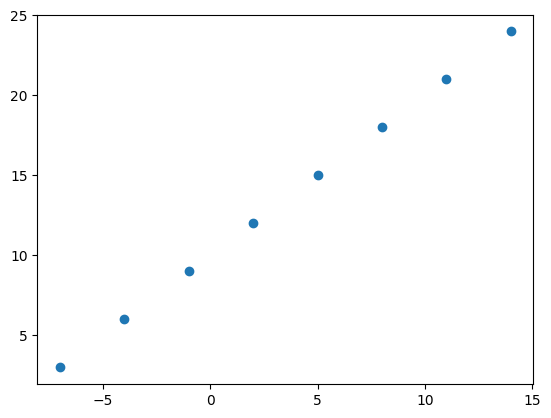

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# Create the features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [5]:
#y == X + 10
# X + 10 is the pattern

## Input and output shapes

In [6]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [7]:
X[0], y[0]

(-7.0, 3.0)

In [8]:
X[1], y[1]

(-4.0, 6.0)

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [10]:
X[0].ndim

0

In [11]:
X[0],y[0]

(-7.0, 3.0)

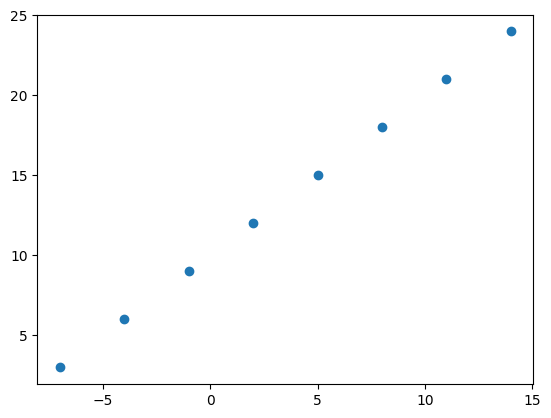

In [12]:
# Create features (using tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);




In [13]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

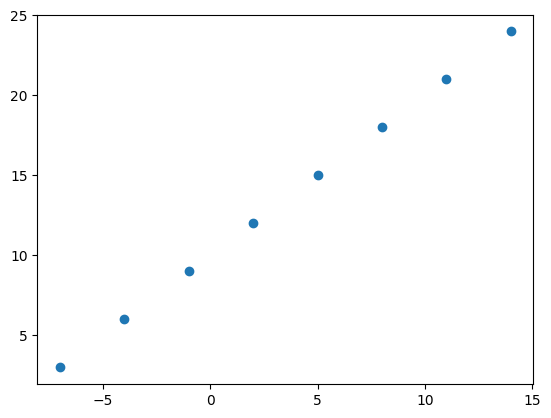

In [14]:
plt.scatter(X,y)

## Steps in modeling with TensorFlow

1. **Creating a model** - define input and output layers, as well as hidden lays of deep learning model.
2. **Compiling a model** - define the loss function (in other words, the funciton which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model)
3. **Fitting a model** - letting the model try and find patterns between X & y (features and labels)

In [15]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])


# 3. Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 810ms/step - loss: 10.2804 - mae: 10.2804
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 10.1479 - mae: 10.1479
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 10.0154 - mae: 10.0154
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 9.8829 - mae: 9.8829
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 9.7504 - mae: 9.7504


In [16]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [17]:
# Try and make a prediction using our model
y_pred = model.predict(np.array([17.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


array([[18.663069]], dtype=float32)

In [18]:
y_pred + 11

array([[29.663069]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a mode** - here we might change the optimization function or perhaps the **Learning Rate** of the optimization function
3. **Fitting the Model** - here we might fit the model for more **Epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [19]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])


# 3. Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step - loss: 7.6088 - mae: 7.6088
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 7.4925 - mae: 7.4925
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 7.4869 - mae: 7.4869
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 7.4813 - mae: 7.4813
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 7.4756 - mae: 7.4756
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 7.4700 - mae: 7.4700
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 7.4644 - mae: 7.4644
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 7.4587 - mae: 7.4587
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 7.4531 - mae: 7.4531
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 7.4475 - mae: 7.4475
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 7.4419 - mae: 7.4419
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 7.4362 - mae: 7.4362
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/s

In [20]:
# Remind ourselves of the data
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [21]:
# Lets see if our models prediction has improved
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


array([[29.96199]], dtype=float32)

In [22]:
# Lets see if we can make another change to improve the model

# 1. Create the model (this time wkith an extra hidden lays with 100 hiden units)

modelA = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
modelA.compile(loss = "mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
#modelA.fit(tf.expand_dims(X, axis=-1), y, epochs=100)


In [23]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [24]:
#modelA.predict(np.array([17.0]))
#LEARNING RATE IS THE MOST IMPORANT hyper parameter of many different neural networks!!!

## Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ...
```


When it comes to evaluation.. there are 3 words you should memorize:
> "Visualize, visualize, visualize"

Its a good idea to visualize:
* The data - what data are we working with, what does it look like ?
* The model itself - what does our model look like?
* The training of the model -  how does a model perform while it learns?
* The predictions - how do the predictions of a model line up against the ground truth (the orignal labels)


In [25]:
# Make a bigger data set
X = tf.range(-100, 100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [26]:
# Make labels for dataset
y = X + 10 # pattern we want model t learn
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

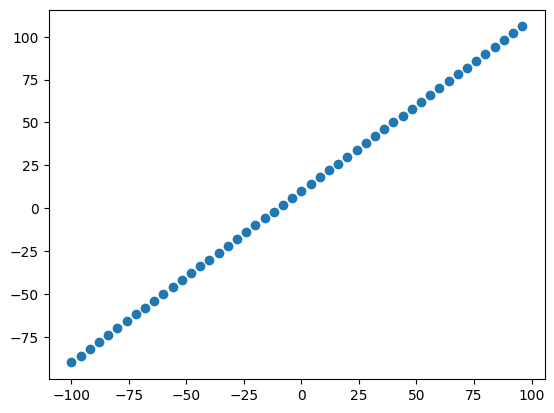

In [27]:
# Visulize the data
plt.scatter(X,y)

### The 3 sets...

* Training set - the model learns from this data, which is typically 70-80 percent of the total data avaiable.
*Validation set - model gets tuned on this data, which is typically 10-15% of the data avbailable.
*Test set - model gets evaluated on this data to test what is has learned, this set is typcially 10-15% of the total data available.

In [28]:
# Check length of how many samples we have
len(X)

50

In [29]:
# Skip valiation set

In [30]:
# Split the data into train and test sets
X_train = X[:40] # first 40 trainng samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of data)
y_test = y[40:]

len(X_train), len(X_test),len(y_train), len(y_test)

(40, 10, 40, 10)

# visualize data

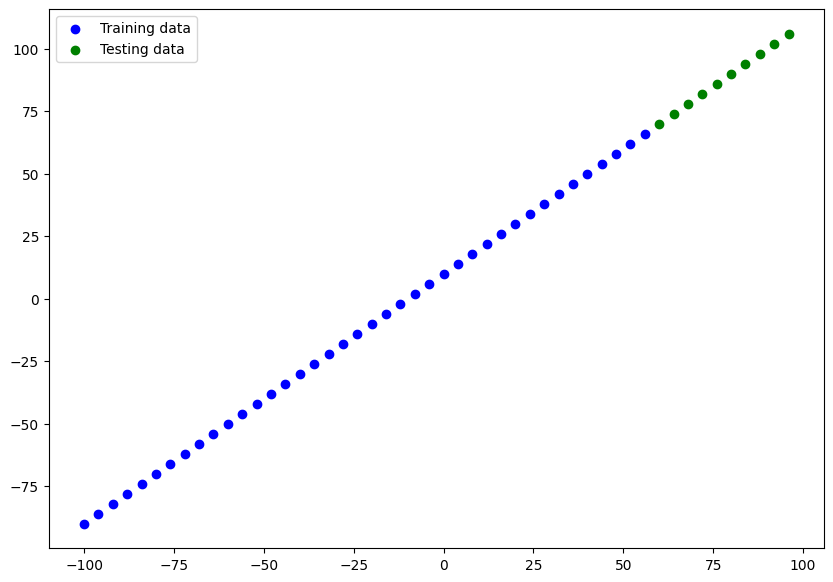

In [31]:
plt.figure(figsize=(10,7))
# Plot trianing data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend
plt.legend();

In [32]:
# Lets have look on how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
#model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)
#model.fit(X_train, y_train, epochs=100)

### Visualizing the model

In [33]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:
# lets create a model which builds automatically by defining input_shape inthe first layer
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape= [1], name ="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
],name ="model_1")

# Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 1)                   │               2 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

**Calling summary() on our model shows us the layers it contains, the output shape and the number of parameters.

Total params - total number of parameters in the model.
Trainable parameters - these are the parameters (patterns) the model can update as it trains.

Non-trainable parameters - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).
📖 Resource: For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video.

🛠 Exercise: Try playing around with the number of hidden units in the Dense layer (e.g. Dense(2), Dense(3)). How does this change the Total/Trainable params? Investigate what's causing the change.

For now, all you need to think about these parameters is that their learnable patterns in the data.

In [36]:
# Fit model to training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [37]:
# Get summary of model
model.summary()


Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 1)                   │               2 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6 (28.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

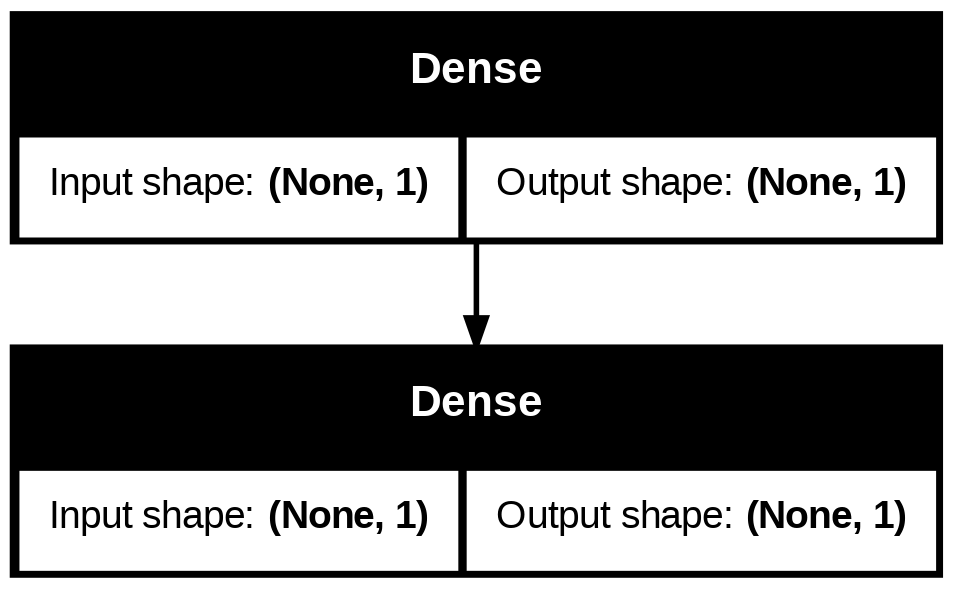

In [38]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)


### Visualizing our models predictions

Now we've got a trained model, let's visualize some predictions.

To visualize predictions, it's always a good idea to plot them against the ground truth labels.

Often you'll see this in the form of y_test vs. y_pred (ground truth vs. predictions).

First, we'll make some predictions on the test data (X_test), remember the model has never seen the test data.

In [39]:
# Make some predictions
y_preds = model.predict(X_test)
y_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[34.11187 ],
       [36.280365],
       [38.448856],
       [40.61735 ],
       [42.785847],
       [44.95434 ],
       [47.122837],
       [49.29133 ],
       [51.459824],
       [53.628315]], dtype=float32)

In [40]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

KEY note: python concept: if you feel like youre going to reuse some kind of functionality its a good idea to turn it into a funciton

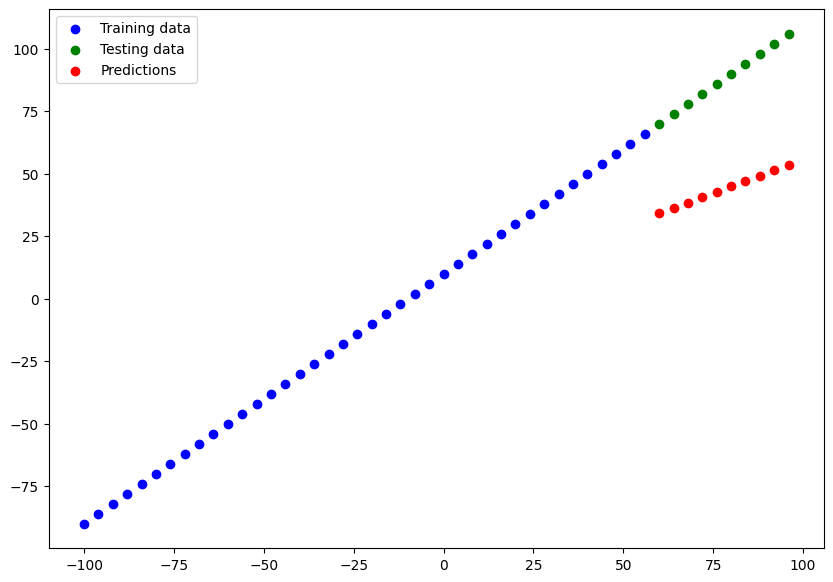

In [41]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();


plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

### Evaluating predictions
Alongisde visualizations, evaulation metrics are your alternative best option for evaluating your model.

Depending on the problem you're working on, different models have different evaluation metrics.

Two of the main metrics used for regression problems are:

Mean absolute error (MAE) - the mean difference between each of the predictions.
Mean squared error (MSE) - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).
The lower each of these values, the better.

You can also use model.evaluate() which will return the loss of the model as well as any metrics setup during the compile step.

In [42]:
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - loss: 44.1299 - mae: 44.1299


[44.129905700683594, 44.129905700683594]

In [43]:
# Calculate the mean absolute error
mae = tf.metrics.mae(y_true=y_test,
                                     y_pred=tf.constant(y_preds))
mae


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([35.88813 , 37.719635, 39.551144, 41.38265 , 43.214153, 45.04566 ,
       46.877163, 48.70867 , 50.540176, 52.371685], dtype=float32)>

In [44]:
tf.constant(y_preds)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[34.11187 ],
       [36.280365],
       [38.448856],
       [40.61735 ],
       [42.785847],
       [44.95434 ],
       [47.122837],
       [49.29133 ],
       [51.459824],
       [53.628315]], dtype=float32)>

In [45]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [46]:
tf.squeeze(y_preds)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([34.11187 , 36.280365, 38.448856, 40.61735 , 42.785847, 44.95434 ,
       47.122837, 49.29133 , 51.459824, 53.628315], dtype=float32)>

In [47]:
# calculate mae

mae = tf.metrics.mae(y_true=y_test,
                     y_pred=tf.squeeze(y_preds))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=44.129906>

In [48]:
# Calculate MSE
mse = tf.metrics.mse(y_true=y_test,
                     y_pred=tf.squeeze(y_preds))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1975.1227>

In [49]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_preds):
  return tf.metrics.mae(y_true=y_true,
                        y_pred=tf.squeeze(y_preds))

def mse(y_true,y_preds):
  return tf.metrics.mse(y_true=y_true,
                        y_pred=tf.squeeze(y_preds))

### Running experiments to improve our model

After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:

Get more data - get more examples for your model to train on (more opportunities to learn patterns).

Make your model larger (use a more complex model) - this might come in the form of more layers or more hidden units in each layer.

Train for longer - give your model more of a chance to find the patterns in the data.
Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:

model_1 - same as original model, 1 layer, trained for 100 epochs.

model_2 - 2 layers, trained for 100 epochs.

model_3 - 2 layers, trained for 500 epochs.



In [50]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [51]:
# Build Model 1
tf.random.set_seed(42)

# 1. Create Model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the Model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 106.5276 - mae: 106.5276 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 71.3594 - mae: 71.3594
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 36.3526 - mae: 36.3526 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.9052 - mae: 8.9052
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.8566 - mae: 7.8566 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 10.8164 - mae: 10.8164 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7.6615 - mae: 7.6615
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11.9876 - mae: 11.9876 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.1710 - mae: 8.1710 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.7154 - mae: 8.7154 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.5822 - mae: 8.5822 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.3492 - mae: 8.3492 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


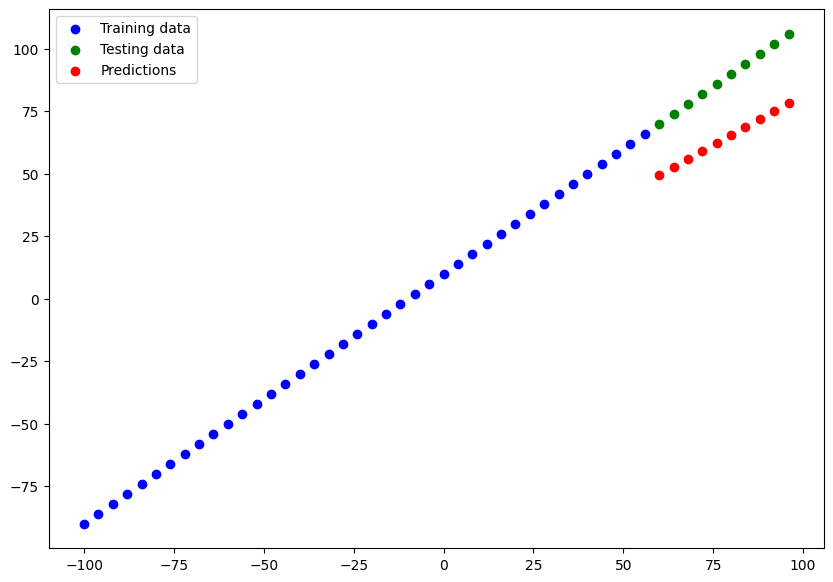

In [52]:
# Make and plot predictions for model 1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [53]:
# Calculte model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=23.9591>,
 <tf.Tensor: shape=(), dtype=float32, numpy=579.14386>)

In [54]:
 #Model 2

# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # set verbose to 0 for less output


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


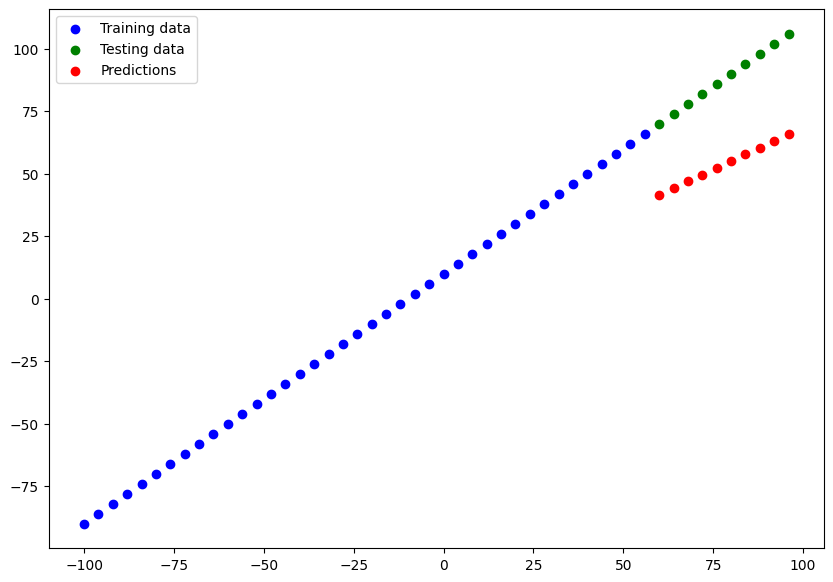

In [55]:

# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [56]:
mae_2 = mae(y_test,y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=34.294514>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1190.6956>)

In [57]:
# Model 3

tf.random.set_seed(42)

# Replicate model_2
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0) # set verbose to 0 for less output


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


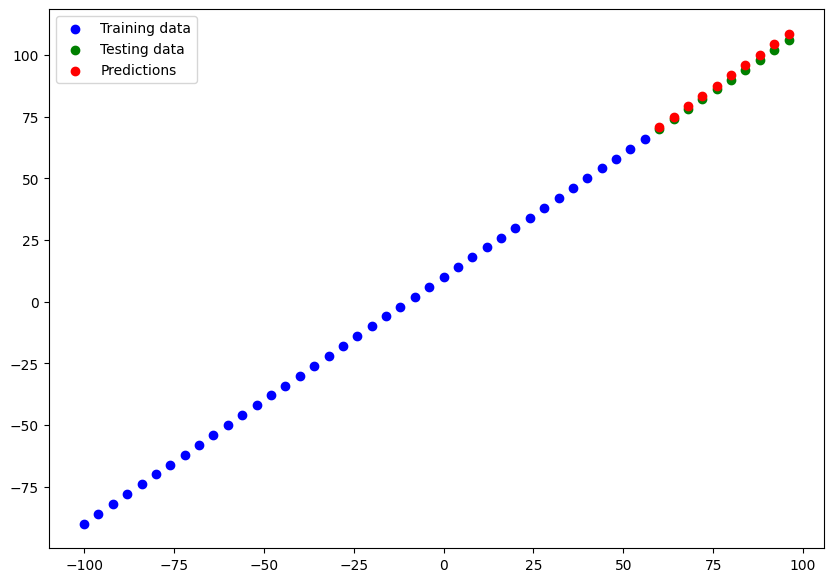

In [58]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [59]:
mae_3 = mae(y_test,y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=1.6215165>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.988461>)

In [60]:
import pandas as pd
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mae_3.numpy()]]
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,23.959101,579.143860
1,model_2,34.294514,1190.695557
2,model_3,1.621516,1.621516


In [61]:
# Model 1 preformed best but I think i did something wrong with my data
model_1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

#And now, you might be thinking, "wow, comparing models is tedious..." and it definitely can be, we've only compared 3 models here.

But this is part of what machine learning modelling is about, trying many different combinations of models and seeing which performs best.

Each model you build is a small experiment.

🔑 Note: One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practitioner's motto: "experiment, experiment, experiment".

Another thing you'll also find is what you thought may work (such as training a model for longer) may not always work and the exact opposite is also often the case.

## Tracking your experiments test
One really good habit to get into is tracking your modelling experiments to see which perform better than others.

We've done a simple version of this above (keeping the results in different variables).

📖 Resource: But as you build more models, you'll want to look into using tools such as:

TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this later).
Weights & Biases - a tool for tracking all kinds of machine learning experiments (the good news for Weights & Biases is it plugs into TensorBoard).

# Saving our Models
Once you've trained a model and found one which performs to your liking, you'll probably want to save it for use elsewhere (like a web application or mobile device).

You can save a TensorFlow/Keras model using model.save().

There are two ways to save a model in TensorFlow:

The SavedModel format (default).
The HDF5 format.
The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

Which one should you use?

It depends on your situation but the SavedModel format will suffice most of the time.

Both methods use the same method call.

In [62]:
# Save model using SaveModel format
tf.saved_model.save(model_1, 'best_model_SavedModel_format')

In [63]:
# Save model in HDF5
model_1.save('best_model_HDF5_format.h5')

### Loading a model

We can load a saved model using the load_model() method.

Loading a model for the different formats (SavedModel and HDF5) is the same (as long as the pathnames to the particular formats are correct).




In [64]:
# Load in SaveModel format model
loaded_saved_model = tf.saved_model.load("best_model_SavedModel_format")


In [65]:
print(loaded_saved_model.signatures)


_SignatureMap({'serving_default': <ConcreteFunction (*, inputs: TensorSpec(shape=(None, 1), dtype=tf.float32, name='inputs')) -> Dict[['output_0', TensorSpec(shape=(None, 1), dtype=tf.float32, name='output_0')]] at 0x7CC1FEA39C60>})


In [66]:
# Load a model from the HDF5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## Downloading a model (from Google Colab)

Say you wanted to get your model from Google Colab to your local machine, you can do one of the following things:

Right click on the file in the files pane and click 'download'.
Use the code below.


In [68]:
# Download the model (or any file) from Google Colab
from google.colab import files
files.download("best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [74]:
# save file from google colab to google drive
!cp best_model_HDF5_format.h5 drive/MyDrive/Organized/ML/Tensorflow_Intro/Models_T_Learning

In [75]:
!ls drive/MyDrive/Organized/ML/Tensorflow_Intro/Models_T_Learning

best_model_HDF5_format.h5


### The larger picture

https://www.kaggle.com/datasets/mirichoi0218/insurance/data

In [112]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [80]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [83]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Turn all categories into numbers

We're going to have to turn the non-numerical columns into numbers (because a neural network can't handle non-numerical inputs).

To do so, we'll use the get_dummies() method in pandas.

It converts categorical variables (like the sex, smoker and region columns) into numerical variables using one-hot encoding.


In [82]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head() # confirm one hot encoding

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [84]:
# Time to split data into features x labels(indendent variables) and y lables (dependent/outcome)
X = insurance_one_hot.drop("charges", axis=1) # gets rid of charges column, axis defines picking either index or column, see info
y = insurance_one_hot["charges"]

In [88]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [89]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [91]:
# Model buidling time!
tf.random.set_seed(42)

# Create model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# Fit the model
insurance_model.fit(X_train,y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 10303.1338 - mae: 10303.1338
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7584.4253 - mae: 7584.4253
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7494.0283 - mae: 7494.0283
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7424.1133 - mae: 7424.1133
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7881.2891 - mae: 7881.2891 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7659.5747 - mae: 7659.5747 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7356.1191 - mae: 7356.1191 
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7628.0566 - mae: 7628.0566 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7355.8076 - mae: 7355.8076 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7834.1519 - mae: 7834.1519 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7573.2529 - mae: 7573.2529  
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s

In [94]:
results = insurance_model.evaluate(X_test,y_test)
print("test loss, test accuracy: ", results)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8241.8105 - mae: 8241.8105 
test loss, test accuracy:  [8221.705078125, 8221.705078125]


## Our model didnt do so good

Lets do 3 things
 - Increase # of layers from 2 -> 3
 - Increase # of units for each layer (except output layer)
 - Change the optimizer from SGD to Adam

In [99]:
tf.random.set_seed(42)

# Create Model 2

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile Model 2
insurance_model_2.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit model
insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 13266.1602 - mae: 13266.1602 
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13122.6494 - mae: 13122.6494 
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12830.5352 - mae: 12830.5352 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12243.7324 - mae: 12243.7324 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11220.8604 - mae: 11220.8604 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9810.6143 - mae: 9810.6143   
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8380.1982 - mae: 8380.1982 
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7533.7197 - mae: 7533.7197 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7385.3188 - mae: 7385.3188 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7357.8760 - mae: 7357.8760
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7336.5103 - mae: 7336.5103
Epoch 12/100
34/34 ━━━━━━━━━━━━

In [100]:
insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4939.2217 - mae: 4939.2217  


[4795.86328125, 4795.86328125]

In [104]:
tf.random.set_seed(42)

# Create Model 3

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile Model 3
insurance_model_3.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/dataset_ops.py:2311: UserWarning: Seed 42 from outer graph might be getting used by function Dataset_map_permutation, if the random op has not been provided any seed. Explicitly set the seed in the function if this is not the intended behavior.
  return map_op._map_v2(


34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 13245.7822 - mae: 13245.7822
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13044.8818 - mae: 13044.8818
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12664.9209 - mae: 12664.9209
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11943.5488 - mae: 11943.5488
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10773.8438 - mae: 10773.8438
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9331.5010 - mae: 9331.5010
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8055.7236 - mae: 8055.7236
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7490.4155 - mae: 7490.4155
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7406.8350 - mae: 7406.8350
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7380.9756 - mae: 7380.9756
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7358.7524 - mae: 7358.7524
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - 

In [105]:
insurance_model_3.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3452.8262 - mae: 3452.8262  


[3389.065673828125, 3389.065673828125]

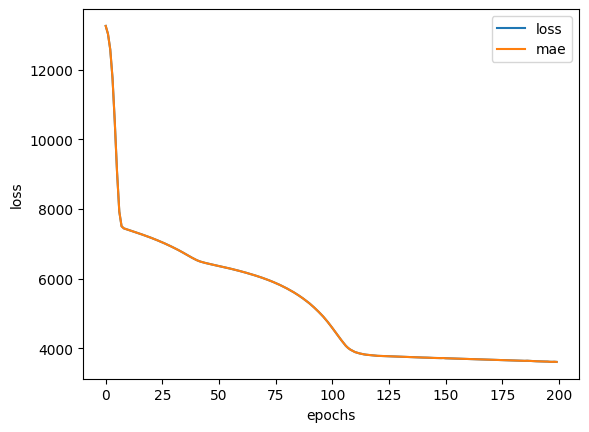

In [113]:
# Plot history aka training curse / loss curve
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss");

## Question: How long should you train for?

It depends on what problem you're working on. Sometimes training won't take very long, other times it'll take longer than you expect. A common method is to set your model training for a very long time (e.g. 1000's of epochs) but set it up with an EarlyStopping callback so it stops automatically when it stops improving. We'll see this in another module.

Let's train the same model as above for a little longer. We can do this but calling fit on it again.

## Preprocessing data (normalization and standardization)

A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.

This practice is called normalization (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).

There is another process call standardization which converts all of your data to unit variance and 0 mean.

These two practices are often part of a preprocessing pipeline (a series of functions to prepare your data for use with neural networks).

Knowing this, some of the major steps you'll take to preprocess your data for a neural network include:

Turning all of your data to numbers (a neural network can't handle strings).
Making sure your data is in the right shape (verifying input and output shapes).
Feature scaling:
Normalizing data (making sure all values are between 0 and 1). This is done by subtracting the minimum value then dividing by the maximum value minus the minimum. This is also referred to as min-max scaling.
Standardization (making sure all values have a mean of 0 and a variance of 1). This is done by subtracting the mean value from the target feature and then dividing it by the standard deviation.
Which one should you use?
With neural networks you'll tend to favour normalization as they tend to prefer values between 0 and 1 (you'll see this espcially with image processing), however, you'll often find a neural network can perform pretty well with minimal feature scaling.
📖 Resource: For more on preprocessing data, I'd recommend reading the following resources:

Scikit-Learn's documentation on preprocessing data.
Scale, Standardize or Normalize with Scikit-Learn by Jeff Hale.


In [114]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,False,True,True,False,False,True,False,False
1334,18,31.920,0,True,False,True,False,True,False,False,False
1335,18,36.850,0,True,False,True,False,False,False,True,False
1336,21,25.800,0,True,False,True,False,False,False,False,True


<Axes: ylabel='Frequency'>

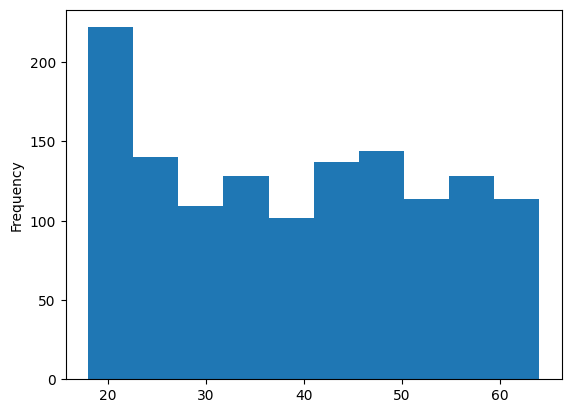

In [116]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

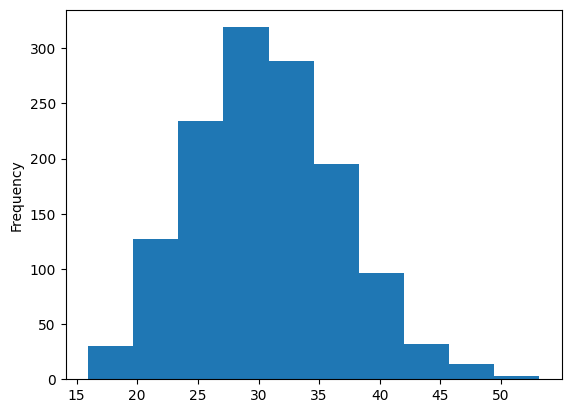

In [117]:
X["bmi"].plot(kind="hist")

In [118]:
X["children"].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


In [119]:
# Start fresh!!
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [121]:
insuranceP = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [122]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

# Create X and y
X = insuranceP.drop("charges", axis=1)
y = insuranceP["charges"]

# Build train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization(MinMaxScaler) and one hot encoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [125]:
# What does past data look like
X_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [123]:
# What does our data look like now
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [126]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [132]:
# build model!

tf.random.set_seed(42)

# Build
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile
insurance_model_4.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics =['mae'])

# fit
insurance_model_4.fit(X_train_normal, y_train, epochs=200)


Epoch 1/200


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/dataset_ops.py:2311: UserWarning: Seed 42 from outer graph might be getting used by function Dataset_map_permutation, if the random op has not been provided any seed. Explicitly set the seed in the function if this is not the intended behavior.
  return map_op._map_v2(


34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 13297.4170 - mae: 13297.4170
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13290.2793 - mae: 13290.2793
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13272.9951 - mae: 13272.9951
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13235.3701 - mae: 13235.3701
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13166.0508 - mae: 13166.0508
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13053.9102 - mae: 13053.9102
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12888.2881 - mae: 12888.2881
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12658.7988 - mae: 12658.7988
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12355.5596 - mae: 12355.5596
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11971.0107 - mae: 11971.0107
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11511.5771 - mae: 11511.5771
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s

In [133]:
# Evaluate insurance model 4
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3213.3838 - mae: 3213.3838


[3160.85400390625, 3160.85400390625]